In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
RUN_ID = 'dae' #denoising autoencoder

In [4]:
from keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train = X_train.reshape((-1, 784)).astype('float')
X_train /= 255.
X_test = X_test.reshape((-1, 784)).astype('float')
X_test /= 255.

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

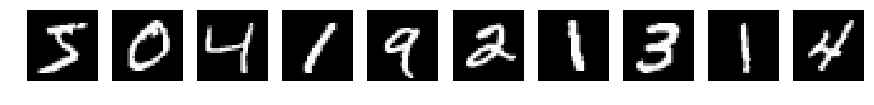

In [23]:
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2)) ####
for i in range(n):
    ax[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

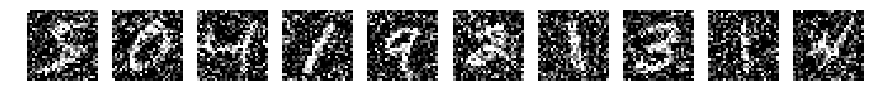

In [21]:
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

In [24]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'mse')


hist = model.fit(x_train_noisy, X_train, epochs=20, batch_size=128,
                 verbose=1, validation_data=(x_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s - loss: 0.0450 - val_loss: 0.0291
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.0269 - val_loss: 0.0248
Epoch 3/20
60000/60000 [==============================] - 3s - loss: 0.0244 - val_loss: 0.0235
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.0231 - val_loss: 0.0221
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.0218 - val_loss: 0.0212
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.0210 - val_loss: 0.0205
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.0203 - val_loss: 0.0200
Epoch 8/20
60000/60000 [==============================] - 3s - loss: 0.0198 - val_loss: 0.0196
Epoch 9/20
60000/60000 [==============================] - 3s - loss: 0.0193 - val_loss: 0.0192
Epoch 10/20
60000/60000 [==============================] - 3s - loss: 0.0190 - val_loss: 0.0190

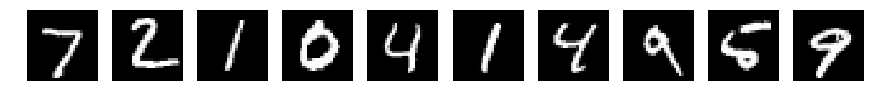

In [27]:
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

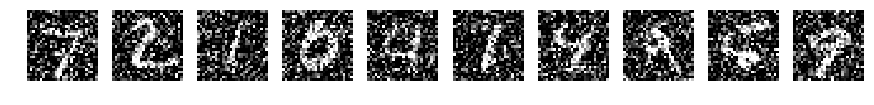

In [25]:
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

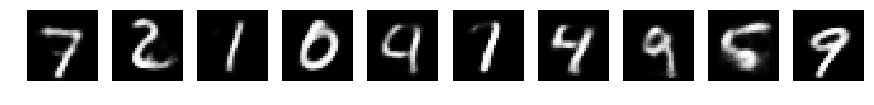

In [26]:
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(model.predict(x_test_noisy[i].reshape(1,784)).reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()